In [43]:
import pandas as pd
import numpy as np
from sklearn import ensemble, model_selection, metrics, naive_bayes, linear_model 
import matplotlib.pyplot as plt 
import seaborn as sb
import nltk
import os
import itertools


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
current_folder = os.getcwd()
data = pd.read_csv(current_folder + '/data/emails.csv')
tmp_data = data
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


So we can see that we have the ID Email 1, 2, ..., 5172 followed by 3000 columns which contains the count of each word in the letter and finaly we have the column 'Prediction' which marks an email as spam or not.

What we suspect is that words such as 'the', 'to' 'ect', so called stop words, and so on will be common in both spam and non spam, ham, emails

In [3]:
data.sum()

Email No.     Email 1Email 2Email 3Email 4Email 5Email 6Emai...
the                                                       34345
to                                                        32005
ect                                                       26604
and                                                       15907
                                    ...                        
military                                                     34
allowing                                                     21
ff                                                         4731
dry                                                          36
Prediction                                                 1500
Length: 3002, dtype: object

this shows that the stop words are indeed common. Furthermore since the sum of the prediction column is 1500 while the dataset has 5172 rows we know that the dataset is a bit unbalanced with 29% being spam and the rest ham. The first step will be to remove the stop words from the dataset. However first we'll split the data into train and test set and at the same time we'll drop the email name.

In [4]:
target = data.pop('Prediction')
data = data.drop(data.columns[0], axis = 1)
data_train, data_test, target_train, target_test = model_selection.train_test_split(data, target, test_size=0.2, random_state=42)

Before proceeding we'll check how balanced the datasets are

C:\Users\Asus\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(1204, 3001)
(2933, 3001)


<Figure size 720x360 with 0 Axes>

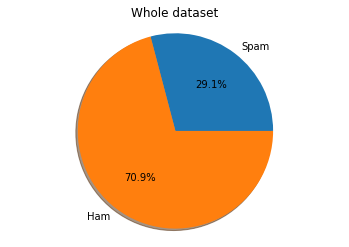

(1204, 3001)
(2933, 3001)


C:\Users\Asus\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Figure size 720x360 with 0 Axes>

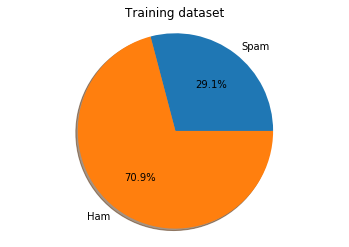

C:\Users\Asus\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(296, 3001)
(739, 3001)


<Figure size 720x360 with 0 Axes>

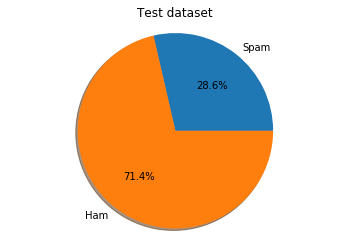

In [5]:
tmp_train = data_train
tmp_train['Prediction'] = target_train
tmp_data_spam = tmp_train.loc[tmp_train['Prediction'] == 1]
tmp_data_ham = tmp_train.loc[tmp_train['Prediction'] == 0]

plt.figure(1, figsize=(10,5))
print(tmp_data_spam.shape)
print(tmp_data_ham.shape)
labels = ['Spam', 'Ham']
number = [len(tmp_data_spam), len(tmp_data_ham)]
fig1, ax1 = plt.subplots()
ax1.pie(number, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set(title = 'Whole dataset') 
plt.show()

tmp_train = data_train
tmp_train['Prediction'] = target_train
tmp_data_spam = tmp_train.loc[tmp_train['Prediction'] == 1]
tmp_data_ham = tmp_train.loc[tmp_train['Prediction'] == 0]

plt.figure(1, figsize=(10,5))
print(tmp_data_spam.shape)
print(tmp_data_ham.shape)
labels = ['Spam', 'Ham']
number = [len(tmp_data_spam), len(tmp_data_ham)]
fig1, ax1 = plt.subplots()
ax1.pie(number, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set(title = 'Training dataset') 
plt.show()

tmp_test = data_test
tmp_test['Prediction'] = target_test
tmp_data_spam_test = tmp_test.loc[tmp_test['Prediction'] == 1]
tmp_data_ham_test = tmp_test.loc[tmp_test['Prediction'] == 0]

plt.figure(1, figsize=(10,5))
print(tmp_data_spam_test.shape)
print(tmp_data_ham_test.shape)
labels = ['Spam', 'Ham']
number = [len(tmp_data_spam_test), len(tmp_data_ham_test)]
fig1, ax1 = plt.subplots()
ax1.pie(number, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set(title = 'Test dataset') 
plt.show()

so the datasets might be a bit unbalanced but atleast the training and testing has almost the same perecentage ham and spam. Now we'll remove the stopwords from both sets

In [6]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
for i in range(len(stop_words)):
    if stop_words[i] in data_train.columns:
        data_train =  data_train.drop(columns = stop_words[i])
        data_test = data_test.drop(columns = stop_words[i])
data_train = data_train.drop(columns = 'Prediction')
data_test = data_test.drop(columns = 'Prediction')
print(data_train.shape)
print(data_test.shape)

(4137, 2866)
(1035, 2866)


So as we can see removeing the stopwords, the target, and mail name, decreased the dataset to 2867 columns. However we can't be sure that we've covered all stop words, for example single letters which is what we'll deal with next.  

In [8]:
pd.set_option('display.max_rows', 1000)
print(data_train.iloc[:,1:-1].sum(axis = 0).sort_values(ascending = False).head(200))
pd.set_option('display.max_rows', 20)

e            350575
n            199030
r            187419
l            128475
c            124021
h            111083
u             91435
p             72317
f             59712
g             53679
b             52145
th            51742
w             46512
v             32137
en            31714
ct            28220
k             26249
ti            24627
al            23829
co            23193
ed            21043
st            20931
nd            19859
le            19592
se            19011
de            17222
ea            15767
j             15527
et            13824
ce            13544
ic            13434
ur            13082
hi            12401
el            12332
ac            12238
x             11199
ca            10960
wi            10374
na             9704
us             9161
la             9129
da             9030
tr             8957
hou            8465
pa             8403
em             8192
com            7458
ad             7400
mi             7334
un             6954


By looking at the combined dataset it appears as we can safely filter out any columns with a sum over 3200

In [9]:
print(data_train.shape)
sum = data_train.sum(axis = 0)
to_remove = []
for i in range(len(sum)):
    if data_train.iloc[:,i].sum(axis = 0) > 3200:
        to_remove.append(i)
data_train = data_train.drop(data_train.columns[to_remove], axis = 1)
print(data_train.shape)

(4137, 2866)
(4137, 2779)


So we've now reduced the data down to a "mere" 2779 different words or sign combinations. We can then look at the 10 words with highest count in the data.

In [10]:
data_train

,gas,deal,meter,hpl,please,corp,know,need,forwarded,new,...,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,dry
3164,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2067,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4717,0,0,0,0,0,1,1,0,0,7,...,0,0,0,0,0,0,0,0,0,0
2505,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2268,0,0,0,0,0,2,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3092,1,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3772,0,0,0,0,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


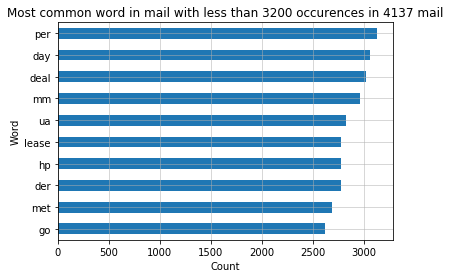

In [11]:
most_common = data_train.iloc[:,0:-2].sum(axis = 0).sort_values(ascending = False).head(10)
most_common.plot(kind = 'barh')
ax = plt.gca()
ax.set(title = 'Most common word in mail with less than 3200 occurences in 4137 mail', ylabel = 'Word', xlabel = 'Count') #give names to axis
ax.invert_yaxis()
ax.grid(linestyle = '-', linewidth = 0.5)
plt.show()

The only word on this list which can't be explained, under the assumption that all mails are written in englis, as either being an abrevation or a word is der. We can also look at the least common words.

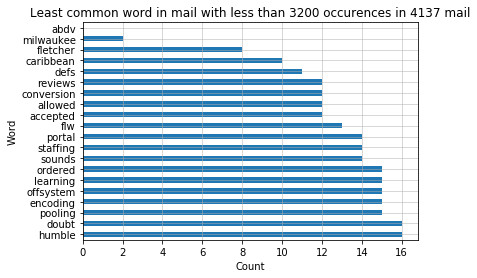

In [12]:
least_common = data_train.iloc[:,0:-2].sum(axis = 0).sort_values(ascending = True).head(20)
least_common.plot(kind = 'barh')
ax = plt.gca()
ax.set(title = 'Least common word in mail with less than 3200 occurences in 4137 mail', ylabel = 'Word', xlabel = 'Count') #give names to axis
ax.invert_yaxis()
ax.grid(linestyle = '-', linewidth = 0.5)
plt.show()

We can now look at the most common word found in spam mails contra ham mail

In [13]:
tmp_train = data_train
tmp_train['Prediction'] = target_train
tmp_data_spam = tmp_train.loc[tmp_train['Prediction'] == 1]
tmp_data_ham = tmp_train.loc[tmp_train['Prediction'] == 0]
print(tmp_data_spam.shape)
print(tmp_data_ham.shape)

(1204, 2780)
(2933, 2780)


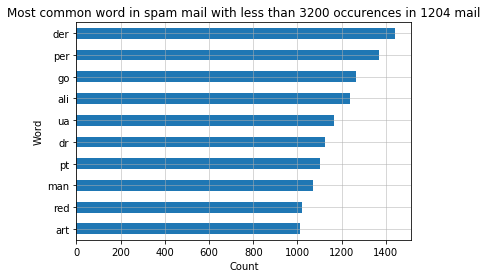

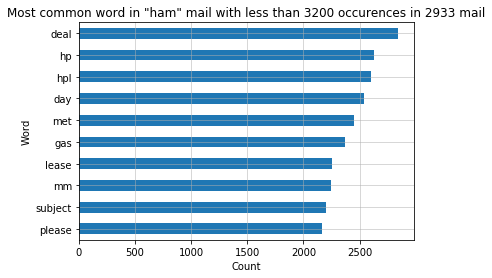

In [14]:
most_common_spam = tmp_data_spam.iloc[:,0:-2].sum(axis = 0).sort_values(ascending = False).head(10)
most_common_spam.plot(kind = 'barh')
plt.figure(1, figsize=(10,5))
ax = plt.gca()
ax.set(title = 'Most common word in spam mail with less than 3200 occurences in 1204 mail', ylabel = 'Word', xlabel = 'Count') #give names to axis
ax.invert_yaxis()
ax.grid(linestyle = '-', linewidth = 0.5)
plt.show()

most_common_ham = tmp_data_ham.iloc[:,0:-2].sum(axis = 0).sort_values(ascending = False).head(10)
most_common_ham.plot(kind = 'barh')
plt.figure(1, figsize=(10,5))
ax = plt.gca()
ax.set(title = 'Most common word in "ham" mail with less than 3200 occurences in 2933 mail', ylabel = 'Word', xlabel = 'Count') #give names to axis
ax.invert_yaxis()
ax.grid(linestyle = '-', linewidth = 0.5)
plt.show()

So there's zero overlap between the ten most common words, let's expand this to the 20 most common words and see if anything changes,

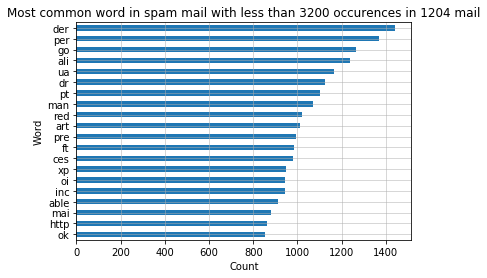

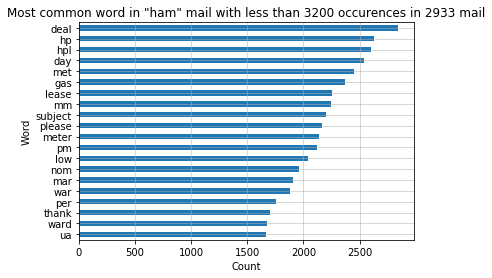

In [15]:
most_common_spam = tmp_data_spam.iloc[:,0:-2].sum(axis = 0).sort_values(ascending = False).head(20)
most_common_spam.plot(kind = 'barh')
plt.figure(1, figsize=(10,15))
ax = plt.gca()
ax.set(title = 'Most common word in spam mail with less than 3200 occurences in 1204 mail', ylabel = 'Word', xlabel = 'Count') #give names to axis
ax.invert_yaxis()
ax.grid(linestyle = '-', linewidth = 0.5)
plt.show()

most_common_ham = tmp_data_ham.iloc[:,0:-2].sum(axis = 0).sort_values(ascending = False).head(20)
most_common_ham.plot(kind = 'barh')
plt.figure(1, figsize=(10,15))
ax = plt.gca()
ax.set(title = 'Most common word in "ham" mail with less than 3200 occurences in 2933 mail', ylabel = 'Word', xlabel = 'Count') #give names to axis
ax.invert_yaxis()
ax.grid(linestyle = '-', linewidth = 0.5)
plt.show()

Here we get some overlap in the form of 'ua' and 'per' now one thing should be noted namely that we do not know the proportions of spam mail written in english contra non english languages for the spam and ham mails, worts case would be spam being written in foreign languages while ham mails being completely english. Let's now look at the least common words instead.

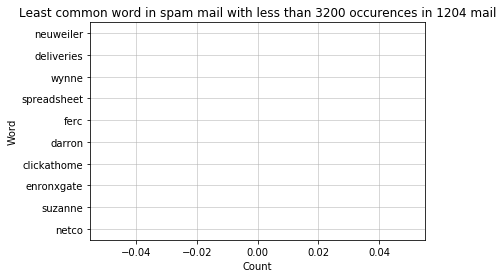

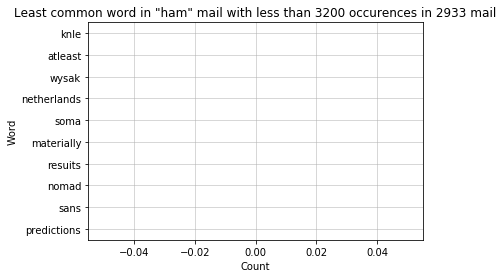

In [16]:
least_common_spam = tmp_data_spam.iloc[:,:-2].sum(axis = 0).sort_values(ascending = True).head(10)
least_common_spam.plot(kind = 'barh')
plt.figure(1, figsize=(10,5))
ax = plt.gca()
ax.set(title = 'Least common word in spam mail with less than 3200 occurences in 1204 mail', ylabel = 'Word', xlabel = 'Count') #give names to axis
ax.invert_yaxis()
ax.grid(linestyle = '-', linewidth = 0.5)
plt.show()

least_common_ham = tmp_data_ham.iloc[:,0:-2].sum(axis = 0).sort_values(ascending = True).head(10)
least_common_ham.plot(kind = 'barh')
plt.figure(1, figsize=(10,5))
ax = plt.gca()
ax.set(title = 'Least common word in "ham" mail with less than 3200 occurences in 2933 mail', ylabel = 'Word', xlabel = 'Count') #give names to axis
ax.invert_yaxis()
ax.grid(linestyle = '-', linewidth = 0.5)
plt.show()

Let's look at the 20 least common words.

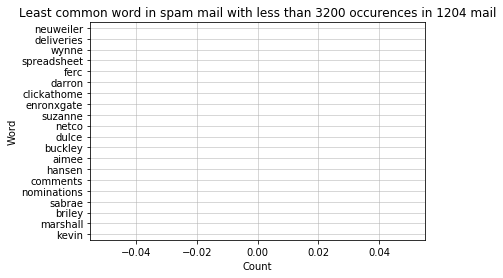

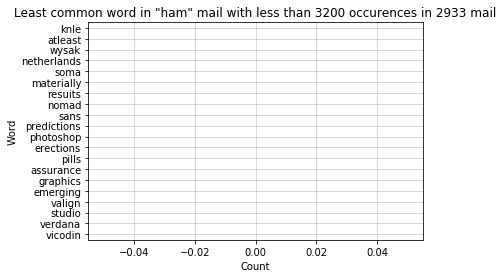

In [17]:
least_common_spam = tmp_data_spam.iloc[:,0:-2].sum(axis = 0).sort_values(ascending = True).head(20)
least_common_spam.plot(kind = 'barh')
plt.figure(1, figsize=(10,5))
ax = plt.gca()
ax.set(title = 'Least common word in spam mail with less than 3200 occurences in 1204 mail', ylabel = 'Word', xlabel = 'Count') #give names to axis
ax.invert_yaxis()
ax.grid(linestyle = '-', linewidth = 0.5)
plt.show()

least_common_ham = tmp_data_ham.iloc[:,0:-2].sum(axis = 0).sort_values(ascending = True).head(20)
least_common_ham.plot(kind = 'barh')
plt.figure(1, figsize=(10,5))
ax = plt.gca()
ax.set(title = 'Least common word in "ham" mail with less than 3200 occurences in 2933 mail', ylabel = 'Word', xlabel = 'Count') #give names to axis
ax.invert_yaxis()
ax.grid(linestyle = '-', linewidth = 0.5)
plt.show()

So what do this tells us well obviously there are words which are found in one but not the other on a bit more high level it appears as spam mails rarely mention names while on the other hands ham mails doesn't mention words which are ment to caught your eyes like materially words which could easily be made to trick someone that they might be able to get some money same thing with mentioning drugs which ham mails doesn't do but we know that spam mail has to mention it since the words with the least occurence in the combined data has 20 counts hence drugs has to appear at least 20 times in the spam mails. 

We'll now try to implement our own spam filter using two algorithms. First we'll look at using naive bayes classifier which will then be compared to a random forest classifier, since we can clearly see some decision rules from looking at the data.

However first we have to remove some of the columns in the test data, the same as we filtered out in the training data, in a real life scenario we would also have removed the stop words at this point.

In [18]:
print(to_remove)

[0, 1, 2, 3, 9, 16, 23, 29, 34, 36, 59, 63, 69, 96, 106, 112, 128, 140, 141, 148, 153, 172, 181, 199, 220, 227, 260, 294, 296, 339, 379, 494, 526, 609, 728, 750, 757, 789, 1059, 1071, 1078, 1126, 1180, 1197, 1299, 1309, 1320, 1333, 1336, 1349, 1408, 1423, 1558, 1563, 1570, 1607, 1617, 1664, 1688, 1758, 1838, 1912, 1924, 1938, 1943, 1995, 2001, 2081, 2123, 2172, 2238, 2270, 2303, 2403, 2404, 2505, 2514, 2529, 2536, 2537, 2555, 2564, 2594, 2615, 2637, 2700, 2864]


In [19]:
data_test = data_test.drop(data_test.columns[to_remove], axis = 1)
data_train = data_train.drop(columns = 'Prediction')
print(data_test.shape)

(1035, 2779)


In [20]:
data_train

,gas,deal,meter,hpl,please,corp,know,need,forwarded,new,...,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,dry
3164,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2067,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4717,0,0,0,0,0,1,1,0,0,7,...,0,0,0,0,0,0,0,0,0,0
2505,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2268,0,0,0,0,0,2,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3092,1,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3772,0,0,0,0,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We'll start with the bayes classifier

In [21]:
bayes = naive_bayes.GaussianNB()
bayes.fit(data_train, target_train)
nb_train_score = bayes.score(data_train, target_train)
nb_test_score = bayes.score(data_test, target_test)
print("Training accuracy: ", nb_train_score)
print("Test accuracy: ", nb_test_score)

Training accuracy:  0.9477882523567803
Test accuracy:  0.9285024154589372


While the accuracy isn't too bad there's other metrics to consider, which we'll look at now

In [33]:
def confusion_matrix_plot(matrix, classes, normalize):
    if normalize == 1:
        matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]
    plt.imshow(matrix, interpolation = 'nearest', cmap = plt.cm.Blues)
    plt.title('Confussion matrix')
    plt.colorbar()
    marks = np.arange(len(classes))
    plt.xticks(marks, classes, rotation=45)
    plt.yticks(marks, classes)

    fmt = '.2f' if normalize else 'd'
    threshold = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > threshold else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Precision:  0.8189655172413793
Recall:  0.9628378378378378


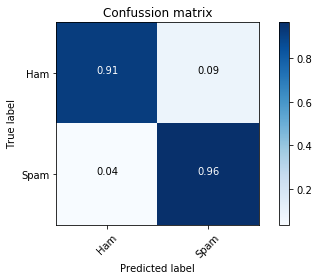

In [37]:
target_predict = bayes.predict(data_test)
plt.figure()
confusion_matrix_plot(metrics.confusion_matrix(target_test, target_predict), ['Ham', 'Spam'], 1)
tn, fp, fn, tp = metrics.confusion_matrix(target_test,target_predict).ravel()
print('Precision: ', tp / (tp + fp))
print('Recall: ', tp / (tp + fn))

What's interesting to note here is that while the precision, indicating how many of our classified spam mails actually where spam, is a bit low the recall which indicates how many of the spam mails found is fairly high. This means that our naive bayes classifier are classifying more mails as spam than necessary however it also finds a lot of the actuall spam mails.

Now we'll compare it to a random forest classifier instead.

Training accuracy:  0.9997582789460963
Test accuracy:  0.9758454106280193
Precision:  0.9385113268608414
Recall:  0.9797297297297297


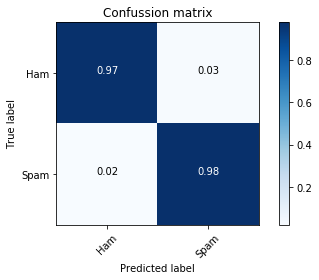

In [41]:
random_forest = ensemble.RandomForestClassifier()
random_forest.fit(data_train, target_train)
rf_train_score = random_forest.score(data_train, target_train)
rf_test_score = random_forest.score(data_test, target_test)
print("Training accuracy: ", rf_train_score)
print("Test accuracy: ", rf_test_score)
target_predict = random_forest.predict(data_test)
plt.figure()
confusion_matrix_plot(metrics.confusion_matrix(target_test, target_predict), ['Ham', 'Spam'], 1)
tn, fp, fn, tp = metrics.confusion_matrix(target_test,target_predict).ravel()
print('Precision: ', tp / (tp + fp))
print('Recall: ', tp / (tp + fn))

So the random forest spam filter not only caught more of the actuall spam, higher recall but also classified less of the non spam mails as being spam, higher precission. As a lost non deep learning method we'll look at a logistic regression.

Training accuracy:  0.9997582789460963
Test accuracy:  0.9758454106280193
Precision:  0.9290322580645162
Recall:  0.972972972972973


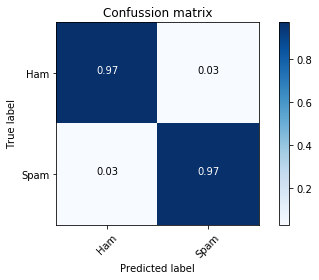

In [44]:
lr = linear_model.LogisticRegression()
lr.fit(data_train, target_train)
lr_train_score = random_forest.score(data_train, target_train)
lr_test_score = random_forest.score(data_test, target_test)
print("Training accuracy: ", lr_train_score)
print("Test accuracy: ", lr_test_score)
target_predict = lr.predict(data_test)
plt.figure()
confusion_matrix_plot(metrics.confusion_matrix(target_test, target_predict), ['Ham', 'Spam'], 1)
tn, fp, fn, tp = metrics.confusion_matrix(target_test,target_predict).ravel()
print('Precision: ', tp / (tp + fp))
print('Recall: ', tp / (tp + fn))

So the logistic regression model performed a bit worse compared to the random forest model on the test data.

So what can we then do to improve the performance? One thing we could try to do is optimize the random forest classifier. Another thing we could do however is to explore a deep learning approach instead.